参考列表：


# **10.1 时间序列的基本概念**

时间序列就是按照时间的顺序记录的一列有序数据。对于时间序列的发展规律进行分析，获得其将来走势的预测值，即为时间序列分析。在日常生活中，时间序列比比皆是，例如超市的销量、商品的价格、油价的波动、日股票闭盘价格等。本章将从<font color='red'>电子商务的应用领域</font>中，介绍一些时间序列预测的方法和实例。

## **10.1.2 时间序列的定义**

在统计研究中，用按时间顺序排列一组随机变量$X_1,X_2，…，X_t，…$来表示一个随机事件的时间序列，简记为**$\{X_t,t\in T\} $**，或$\{X_t\}$。用$x_1，x_2，…，x_n$来表示该随机序列的n个有序观测值。<p>
时间序列分析的目标就是通过分析观测值序列$\{x_n\}$的性质和变化，从而推断得到随机时间序列$\{X_t\}$的性质。

**例：商品价格的时间序列**<p>
下图是某商品在2018年7月-2019年7月之间的每天的价格变化图。从图中可以看出，每天的价格都有差异，但是总体围绕着商品的价值这一条线上下波动。

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文

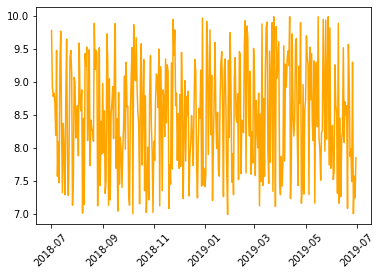

In [28]:
price = pd.read_csv(".\data_chap10\price.csv",header=0,index_col=0)

# 利用pandas把横坐标转为日期格式
price['日期'] = pd.to_datetime(price['日期'])
plt.plot(price['日期'][1:365], price['价格'][1:365], color='orange')
plt.xticks(rotation=45, fontsize=10)
plt.show()

**例：下图是1991年至2003年某车辆的乘客量的时序变化图**

Text(0, 0.5, '乘客量')

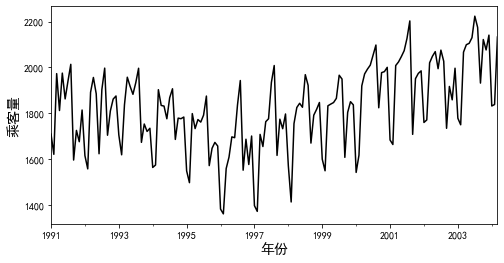

In [6]:
#data from https://github.com/reisanar/datasets
amtrak = pd.read_csv('.\data_chap10\Amtrak.csv', parse_dates=False,index_col='Month', squeeze=True)
amtrak.index = pd.to_datetime(amtrak.index, format='%d/%m/%Y')
amtrak = amtrak.resample('M').mean()

fig, ax = plt.subplots(figsize=[8, 4])
amtrak.plot(ax=ax, color='k')
ax.set_xlabel('年份', size=14)
ax.set_ylabel('乘客量', size=14)

## **10.1.2 时间序列的成分**

时间序列的构成成分主要包括四个构成要素：长期趋势，季节变动，循环变动，不规则变动。。<p>
**1.长期趋势（T）：**现象在较长时期内受某种根本性因素作用而形成的总的变动趋势。<p>
**2.季节变动（S）：**现象在一年内随着季节的变化而发生的有规律的周期性变动。<p>
**3.循环变动（C）：**现象以若干年为周期所呈现出的波浪起伏形态的有规律的变动。<p>
**4.不规则变动（I）：**是一种无规律可循的变动，包括严格的随机变动和不规则的突发性影响很大的变动两种类型。<p>
    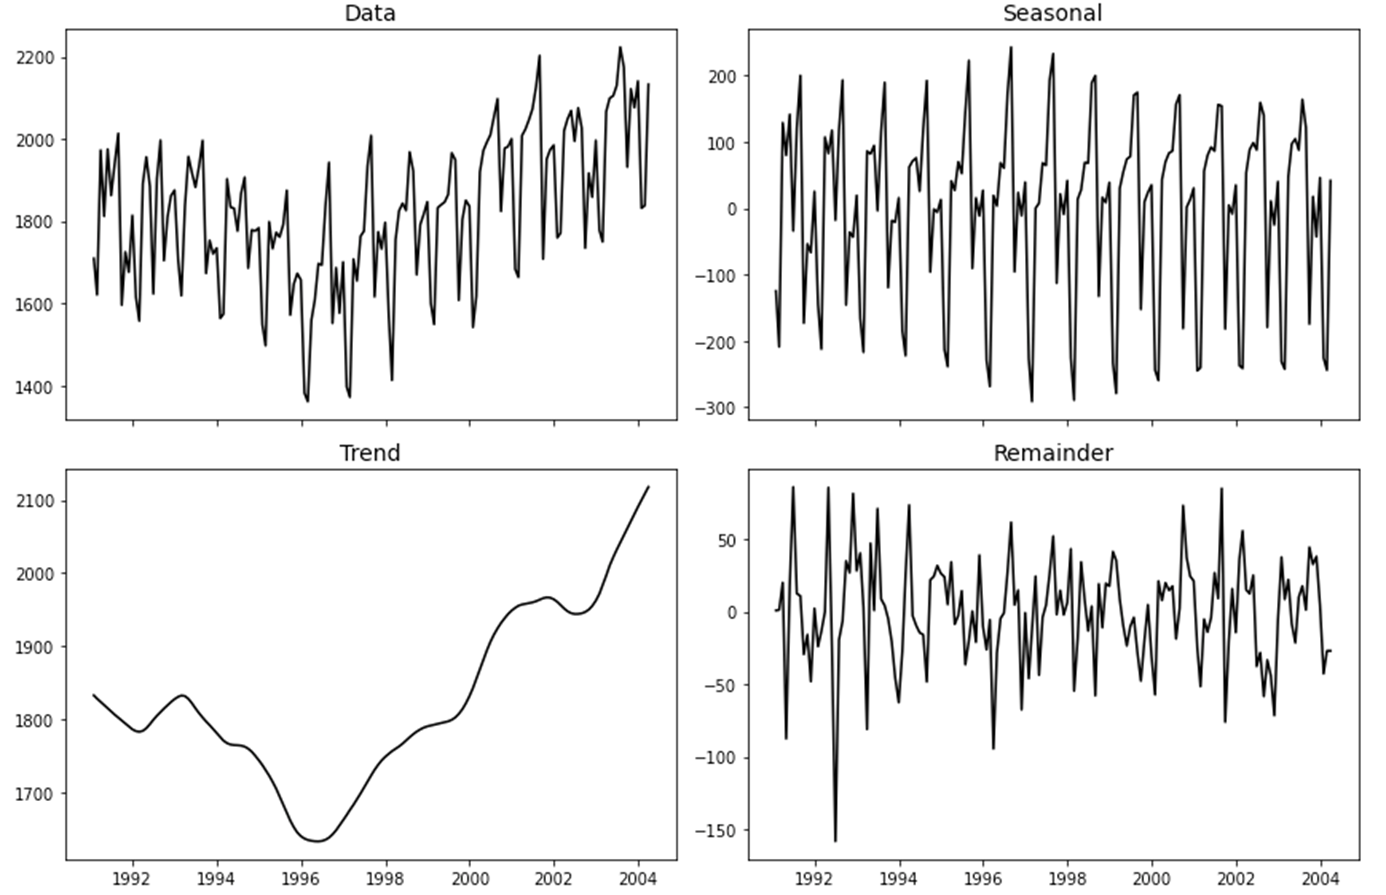

## **10.1.3 时间序列的预测步骤**

**1、观察观测值序列的特征，确定时间序列的类型。**<p>
**2、选择合适的方法建立预测模型。**如果时间序列<font color='red'>没有趋势和季节成分</font>，可选择<font color='red'>移动平均或指数平滑法</font>;<br />
    $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$如果时间序列<font color='red'>含有趋势成分</font>，可选择<font color='red'>趋势预测法</font>；<br />
    $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$如果时间序列含有<font color='red'>季节成分</font>，可选择<font color='red'>季节指数法</font>。<p>
**3、评价模型准确性，确定最优模型参数。**$$ MSE=\frac{1}{n}\sum_{t = 0} ^n(e^2_t)=\frac{1}{n}\sum_{t = 0} ^n(Y_t-F_t)^2$$<p>
**4、按要求进行预测。**<p>         

# **10.2 移动平均和指数平滑**

之前介绍了时间序列的基本概念和性质，现在正式介绍一些处理时间序列的模型方法，第一个则是移动平均法。

## **10.2.1 移动平均（Moving Average, MA）**

移动平均法的原理即为用最近的数据预测未来短时间内的数据，例如简单移动平均法就是通过最近的一组数据求得平均，作为下一个时刻的预测值。该方法适用于围绕一个稳定水平上下波动的时间序列，其利用平均使各个时间点上的观测值中的随机因素互相抵消，以获得关于稳定水平的预测。<p>

**1.简单移动平均**。简单移动平均将包括当前时刻在内的N个时间点上的观测值的平均值作为对于下一时刻的预测值，其中N的选择应使得MSE这一预测误差达到最小。<p>
$$F_{t+1}=\frac{1}{n}\sum_{i=1}^NY_{t-i+1}$$

<font color='blue'>**【例10.2.1-1】**</font>:某汽油批发商在过去12周内汽油的销售数量如下表所示,下面用Python的简单移动平均来分析该数据，并预测13周汽油销量。

| 周 | 销量（千加仑） | 周 | 销量（千加仑） |
| :----: | :----:| :----: | :----: |
| 1 | 17 | 7 | 22 |
| 2 | 21 | 8 | 18 | 
| 3 | 19 | 9 | 22 | 
| 4 | 23 | 10 | 20 |
| 5 | 18 | 11 | 17 | 
| 6 | 20 | 12 | 22 |

**第一步，观察数据形状**<p>

<Figure size 1500x1200 with 0 Axes>

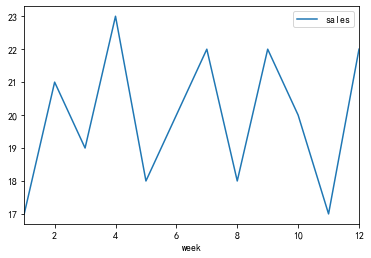

<Figure size 1500x1200 with 0 Axes>

In [60]:
data = pd.read_excel(".\data_chap10\gas.xlsx",header=0)
data.plot(x='week',y='sales')


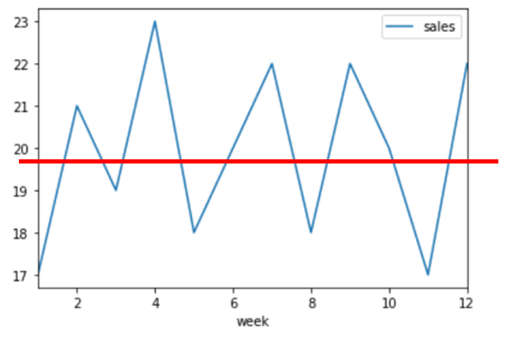
**<center>没有线性趋势 没有周期趋势<center>**

第二步，建立模型

In [59]:
%matplotlib inline
plt.figure(figsize=(10,8),dpi=150)
data['sales'].plot(figsize=(10,6))
data['sales'].rolling(window =3).mean().plot()#window: 确定移动平均的步长

TypeError: list indices must be integers or slices, not str

<Figure size 1500x1200 with 0 Axes>

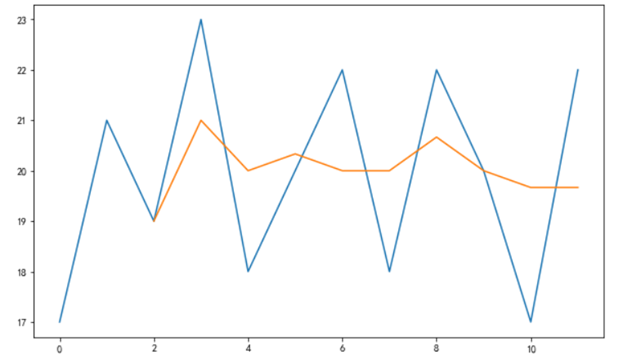

**2.加权移动平均**。简单移动平均的升级版为加权移动平均，即在各个时刻的数据上添加一个权重，考虑了不同时刻的数据对于未来预测值的影响大小不同。不同于机器学习模型中的优化算法，加权移动平均中的权重大小一般是根据经验法或试算法得到。
$$F_{t+1}=w_1Y_{t-1}+w_2Y_{t-2}+w_3Y_{t-3}+…+w_NY_{t-N}$$

## **10.2.2 指数平滑（Expoential Smoothing, ES）**

指数平滑法是布朗（Robert G..Brown）所提出，布朗认为时间序列的态势具有稳定性或规则性，所以时间序列可被合理地顺势推延；他认为最近的过去态势，在某种程度上会持续到最近的未来，所以将较大的权数放在最近的资料。<p>
简单的全期平均法是对时间数列的过去数据一个不漏地全部加以同等利用；移动平均法则不考虑较远期的数据，并在加权移动平均法中给予近期资料更大的权重；而指数平滑法则兼容了全期平均和移动平均所长，不舍弃过去的数据，但是仅给予逐渐减弱的影响程度，即随着数据的远离，赋予逐渐收敛为零的权数。<p>
指数平滑法是在移动平均法基础上发展起来的一种时间序列分析预测法，任一期的指数平滑值都是本期实际观察值与前一期指数平滑值的加权平均。<p>
按照平滑次数的不同，指数平滑可以分为：一次指数平滑法、二次指数平滑法和三次指数平滑法等。

**1.一次指数平滑**。当时间序列无明显的趋势变化，可以用一次指数平滑预测，其预测公式为：<p>
$$\hat Y_{t+1}=\alpha Y_t + \alpha (1-\alpha)\hat Y_t$$
其中$F_{t+1}$为第t+1期的预测值，$Y_t$为第t期的实际值，$F_t$为第t期的预测值，$\alpha$为加权系数。。

**2.二次指数平滑**。当时间序列出现明显的直线趋势时，用一次指数平滑仍然存在明显的滞后偏差，因此需要用二次指数平滑进行修正。其预测公式为：
$$ \left\{
\begin{matrix}
 S_t^{(1)}=\alpha Y_t+(1-\alpha)S_{t-1}^{(1)} \\
 ~~S_t^{(2)}=\alpha S_t^{(1)}+(1-\alpha)S_{t-1}^{(2)} 
\end{matrix}
\right.
$$
其中$S_t^{(1)}$为一次指数的平滑值；$S_t^{(2)}$为二次指数的平滑值，$\alpha$为加权系数，类似于趋势移动平均法，可以用如下的直线模型进行预测。
$$\hat Y_{t+T}=\alpha_t+b_tT,T=1,2,…$$
其中，
$$\left\{
\begin{matrix}
 \alpha_t=2S_t^{(1)}-S_t^{(2)}\\
 ~~~ b_t=\frac{\alpha}{1-\alpha}(S_t^{(1)}-S_t^{(2)} 
\end{matrix}
\right.$$

**3.三次指数平滑。**当时间序列的变动表现为二次曲线趋势时，则需要使用三次指数平滑法。三次指数平滑是在二次指数平滑的基础上，再进行一次平滑，其预测公式为：
$$ \left\{
\begin{matrix}
 S_t^{(1)}=\alpha Y_t+(1-\alpha)S_{t-1}^{(1)} \\
 ~~S_t^{(2)}=\alpha S_t^{(1)}+(1-\alpha)S_{t-1}^{(2)} \\
 ~~S_t^{(3)}=\alpha S_t^{(2)}+(1-\alpha)S_{t-1}^{(3)} 
\end{matrix}
\right.
$$
其中$S_t^{(3)}$为三次指数平滑值。三次指数平滑法的预测模型为：
$$\hat Y_{t+T}=\alpha_t+b_tT+c_tT^2,T=1,2,…$$
其中，
$$
\left\{
\begin{matrix}
 \alpha_t=3S_t^{(1)}-3S_t^{(2)}+S_t^{(3)}\\
 b_t=\frac {\alpha}{1-\alpha}[(6-5\alpha)S_t^{(1)}-2(5-4\alpha)S_t^{(2)}+(4-3\alpha)S_t^{(3)}] \\
 c_t=\frac {\alpha^2}{2(1-\alpha)^2}[S_t^{(1)}-2S_t^{(2)}+S_t^{(3)}] 
\end{matrix}
\right.
$$

<font color='blue'>**【例10.2.2-1】**</font>：利用指数平滑模型来预测某一疾病未来5周的死亡率。

Text(0, 0.5, 'death ratio')

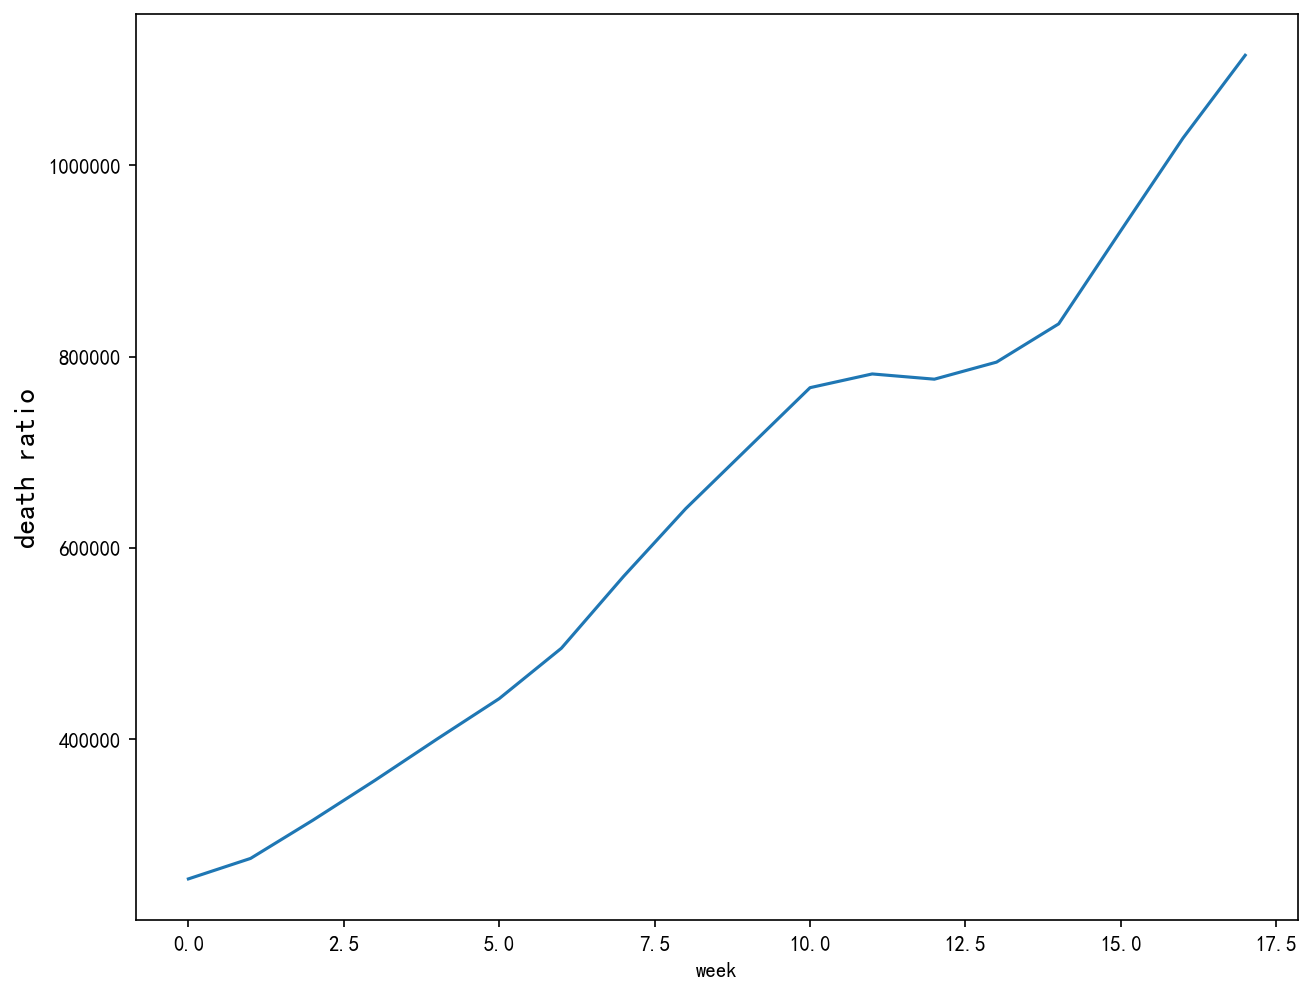

In [57]:
from matplotlib import pyplot as plt
####指数平滑
data = [253993,275396.2,315229.5,356949.6,400158.2,442431.7,495102.9,570164.8,640993.1,704250.4,767455.4,781807.8,776332.3,794161.7,834177.7,931651.5,1028390,1114914]
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) ##设置x轴坐标保持整数
plt.figure(figsize=(10,8),dpi=150)
plt.plot(data)
plt.xlabel('week') 
plt.ylabel("death ratio",size=14)

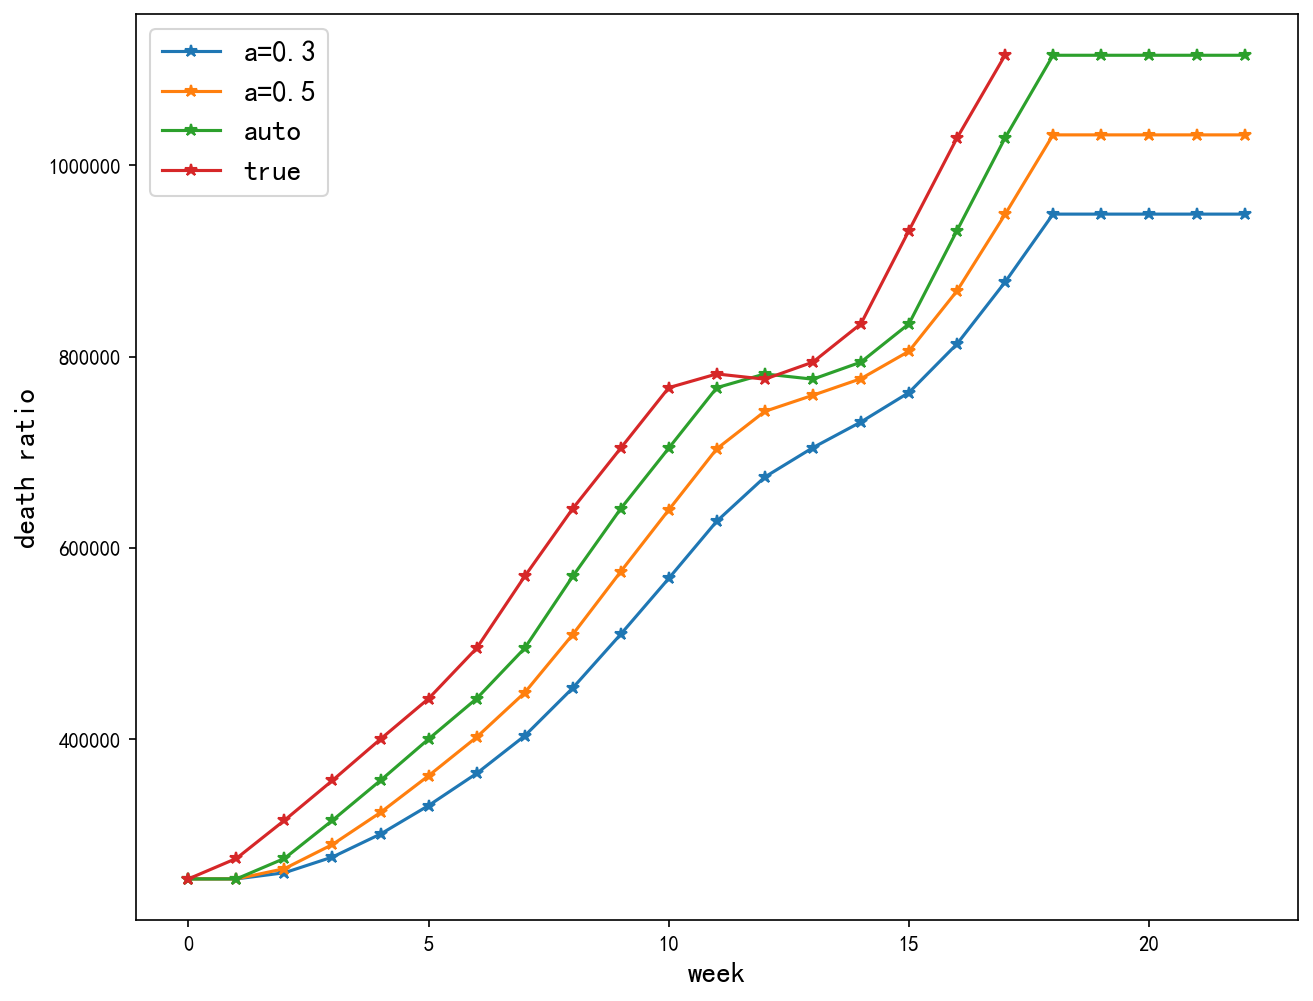

In [58]:
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, 
                                         SimpleExpSmoothing, 
                                         Holt)
##简单指数平滑模型 SES
plt.figure(figsize=(10,8),dpi=150)
##平滑参数α=0.3
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.3,optimized=False)
##plot
l1, = plt.plot(list(fit1.fittedvalues) + list(fit1.forecast(5)), marker='*')
###平滑参数α=0.5
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.5,optimized=False)
#plot
l2, = plt.plot(list(fit2.fittedvalues) + list(fit2.forecast(5)), marker='*')
###允许statsmodels自动寻找最优的平滑参数
fit3 = SimpleExpSmoothing(data).fit()
##plot
l3, = plt.plot(list(fit3.fittedvalues) + list(fit3.forecast(5)), marker='*')
l4, = plt.plot(data, marker='*')
plt.legend(handles = [l1, l2, l3, l4], labels = ['a=0.3', 'a=0.5', 'auto', 'true'], loc = 'best', prop={'size': 14})
plt.xlabel('week',size=14)
plt.ylabel("death ratio",size=14)
plt.show()

# **10.3 趋势预测模型 （一元线性与非线性回归分析与预测）**

## **10.3.1 线性趋势**

对于含有线性趋势成分的时间序列，可以将预测变量在每一个时期的值和其对应时期之间的线性依赖关系表示为：

$$\hat{Y}=a+bX$$

利用使均方误差MSE极小的原则确定系数**a**与**b**，就可得到直线趋势方程，以此求得每一个**Xi**所对应的预测值:

$$\hat{Y_i}=a+bX_i$$

对于一元线性回归的分析和预测，在Python中可以调用scikit-learn库的LinearRegression()函数实现。

<font color='blue'>**【例10.3.1-1】**</font>：某航空公司10年间的年总收入数据如下表所示，试建立线性趋势预测模型并预测第11年的年总收入。

| 年序号 | 总收入 | 年序号 | 总收入 |
| :----: | :----:| :----: | :----: |
| 1 | 2428 | 6 | 4264 |
| 2 | 2951 | 7 | 4738 | 
| 3 | 3533 | 8 | 4920 | 
| 4 | 3618 | 9 | 5318 |
| 5 | 3616 | 10 | 6715 | 

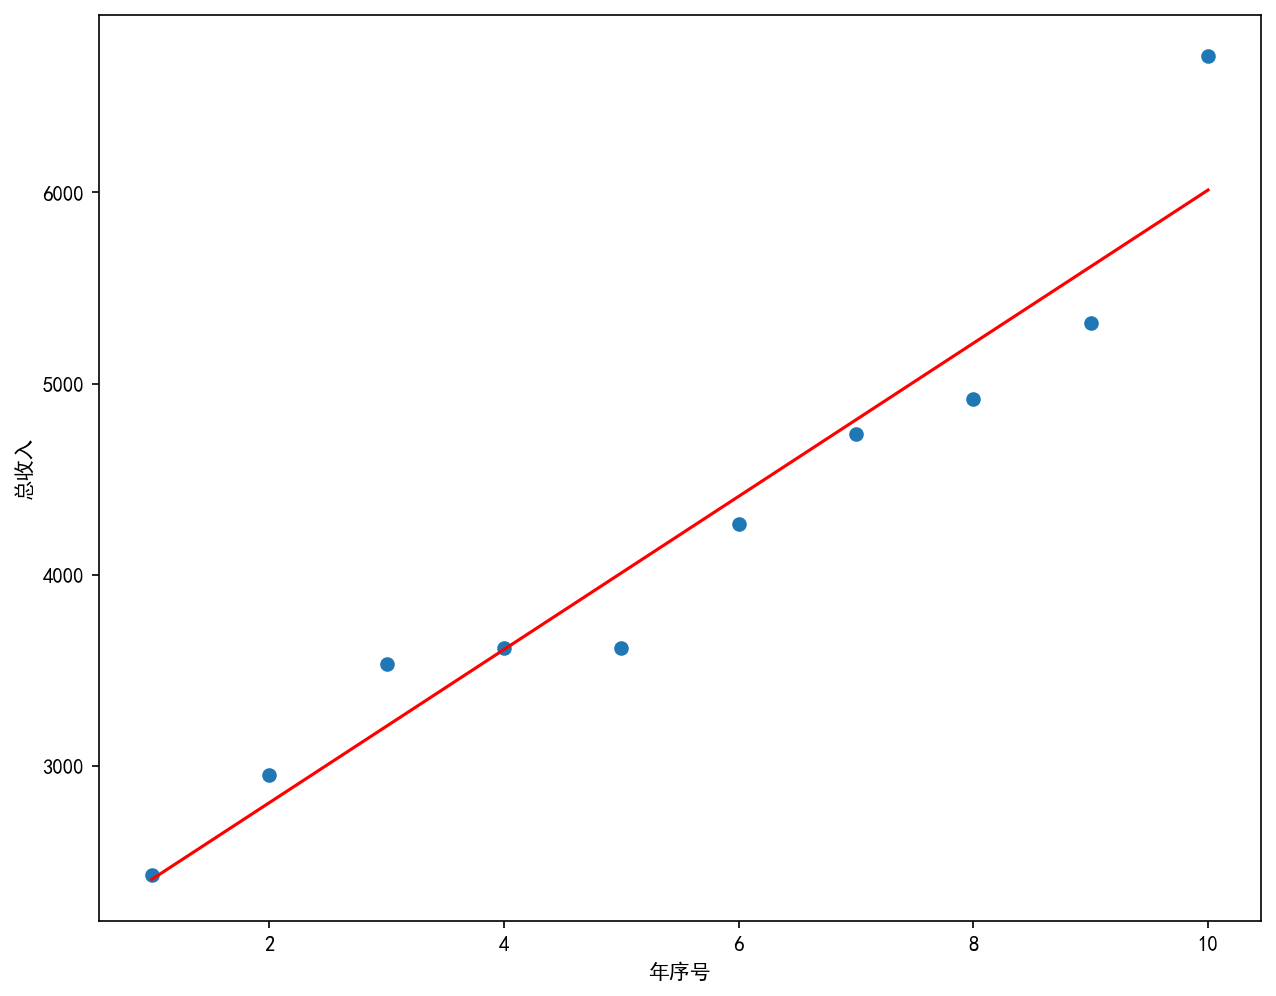

回归系数为400.576,截距项为2006.933


D:\anoconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\anoconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    总收入   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     108.9
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           6.17e-06
Time:                        10:54:08   Log-Likelihood:                -71.616
No. Observations:                  10   AIC:                             147.2
Df Residuals:                       8   BIC:                             147.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2006.9333    238.203      8.425      0.000    1457.637    2556.230
年序号          400.5758     38.390     10.434      0.000     312.049     489.103
==============================================================================
Omnibus:                        3.338   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                1.312
Skew:                           0.886   Prob(JB):                        0.519
Kurtosis:                       3.108   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression

da1 = [1,2,3,4,5,6,7,8,9,10]
da2 = [2428,2951,3533,3618,3616,4264,4738,4920,5318,6715]
df1 = pd.DataFrame(da1)
df2 = pd.DataFrame(da2)
data = pd.concat([df1,df2],axis=1) 
data.columns = ['年序号','总收入']

X = data[['年序号']]
Y = data['总收入']

# 模型搭建
model = LinearRegression()
model.fit(X,Y)
# 模型可视化
plt.figure(figsize=(10,8),dpi=150)
plt.scatter(X,Y)
plt.plot(X,model.predict(X),color='red')
plt.xlabel('年序号')
plt.ylabel('总收入')
plt.show()
 
#查看系数,截距：线性回归方程构造
print("回归系数为%.3f,截距项为%.3f"%(model.coef_[0],model.intercept_))

import statsmodels.api as sm
 
# add_constant()函数给原来的特征变量X添加常数项，并赋给X2，这样才有y＝ax＋b中的常数项，即截距b
X2 = sm.add_constant(X)
# 用OLS()和fit()函数对Y和X2进行线性回归方程搭建
est = sm.OLS(Y,X2).fit()
est.summary()


In [35]:
# 预测
print("第11年的总收入预测值为：%.2f"%(model.predict([[11]])[0]))

第11年的总收入预测值为：6413.27


## **10.3.2 非线性趋势<font color='red'>(需要补充)</font>**

对于非线性，同样可以转化为线性关系，再进行预测。

# **10.4 季节模型**

对于既含有线性趋势成分又含有季节成分的时间序列，须对其成分进行分解，分解模型可以分为加法模型和乘法模型。

## **10.3.1 季节加法模型**

$$Y_t = T_t + S_t + C_t + I_t$$
其中，$T_t$表示趋势成分，$S_t$表示季节成分，$I_t$表示不规则成分。由于不规则成分的不可预测，因此预测值就可表示为趋势成分和季节成分的乘积。<p>
建立季节指数模型的一般步骤如下：<br>
**·**第一步，计算每一季（每季度，每月等等）的季节指数$S_t$；<br>
**·**第二步，用时间序列的每一个观测值除以或减掉适当的季节指数，消除季节影响；<br>
**·**第三步，为消除了季节影响的时间序列建立适当的趋势模型并用这个模型进行预测；<br>
**·**第四步，用预测值乘以或加上季节指数，计算出最终的带季节影响的预测值。 <p>

## **10.3.2 季节乘法模型**

这种分解建立在以下乘法模型的基础上,其中，$T_t$表示趋势成分，$S_t$表示季节成分，$I_t$表示不规则成分。<br>
由于不规则成分的不可预测，因此预测值就可表示为趋势成分和季节成分的乘积。

$$Y_t = T_t × S_t × C_t × I_t$$
乘法模型可以通过取对数变换为加法模型。
$$log(Y_t)=log(T_t)+log(S_t)+log(C_t)+log(I_t)$$

## **10.3.3 混合模型**

$$Y_t = T_t × C_t × S_t + I_t$$
$$Y_t = T_t + C_t × S_t × I_t$$

<font color='blue'>**【例10.3-1】**</font>：美国1949年到1960年每月的航班乘客数量如下图所示，这些数据有明显的季节性波动和趋势性。试预测未来一年内的乘客数量。

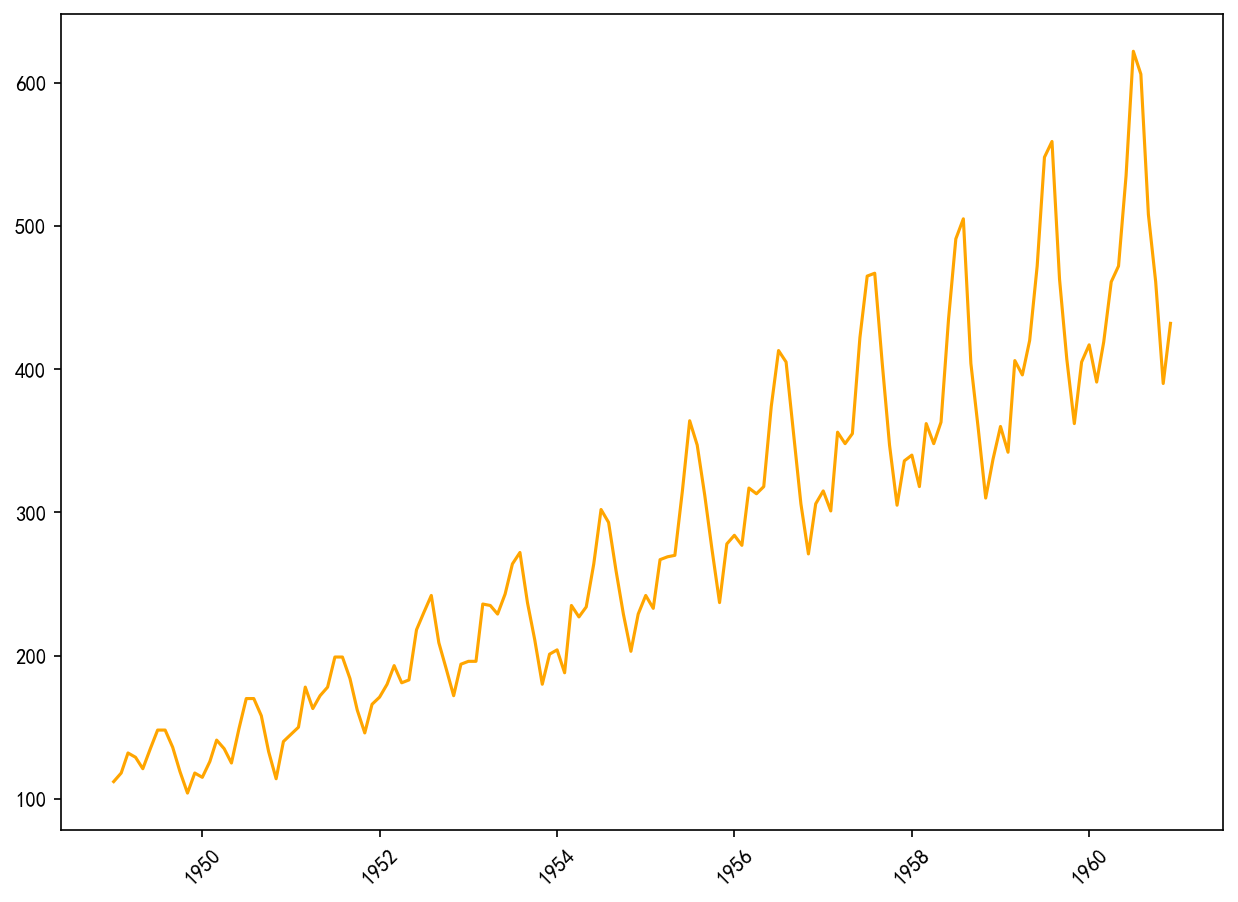

In [69]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


data = read_csv('.\data_chap10\passengers.csv')
# data.index=pd.to_datetime(data['month'],format='%Y-%m')##设置索引列为时间索引
data['month'] = pd.to_datetime(data['month'])

fig = plt.figure(figsize=(10,8),dpi=150)
# 设置 x 轴显示密度
fig.autofmt_xdate()
plt.plot(data['month'], data['passenger'], color='orange')
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [ ]:

##时间序列分解
# 调用seasonal_decompose方法，实现时间序列分解
decompose_result = seasonal_decompose(data['passenger'], model="multiplicative")
decompose_result.plot()
plt.show()

**查看时间序列分解后的结果**<br>

In [41]:
print((decompose_result.seasonal))

month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: passenger, Length: 144, dtype: float64


## 季节指数预测实例

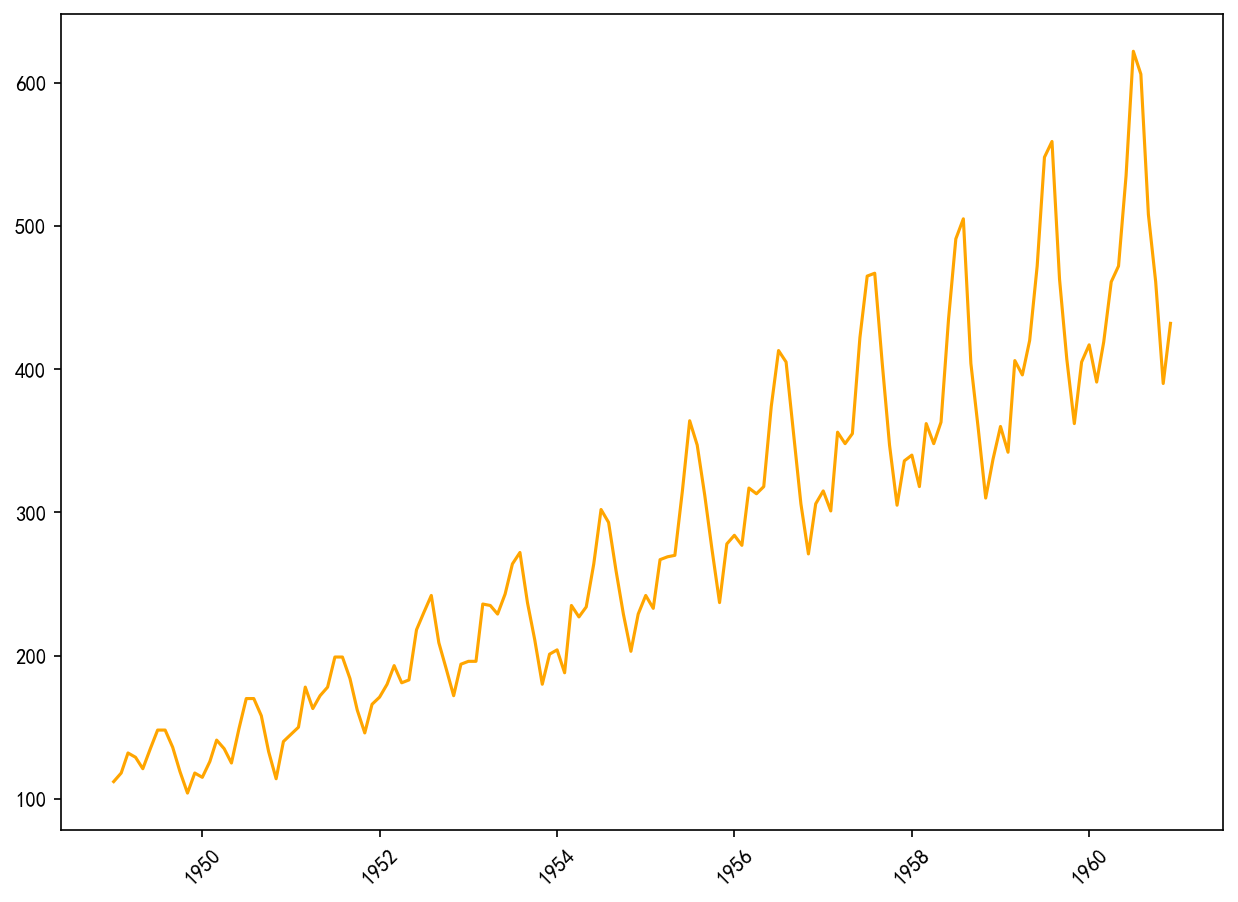

In [83]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


data = read_csv('.\data_chap10\passengers.csv')
# data.index=pd.to_datetime(data['month'],format='%Y-%m')##设置索引列为时间索引
data['month'] = pd.to_datetime(data['month'])

fig = plt.figure(figsize=(10,8),dpi=150)
# 设置 x 轴显示密度
fig.autofmt_xdate()
plt.plot(data['month'], data['passenger'], color='orange')
plt.xticks(rotation=45, fontsize=10)
plt.show()

<Figure size 720x288 with 0 Axes>

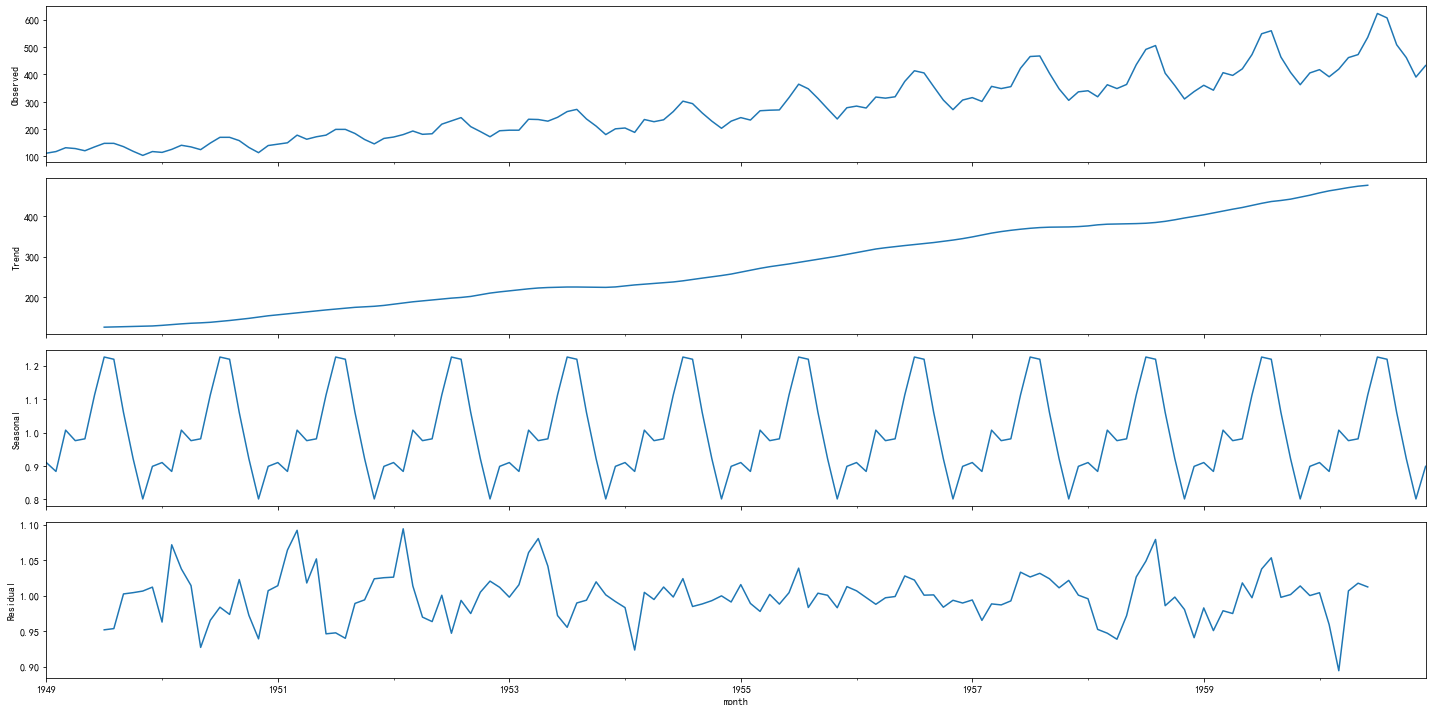

In [87]:
# data.index=pd.to_datetime(data['month'],format='%Y-%m')##设置索引列为时间索引
# data.drop('month',axis=1,inplace=True)

fig = plt.figure(figsize=(10,4))
# 用seasonal_decompose()函数来分解季节成分
decompose_result = seasonal_decompose(data['passenger'], model="multiplicative")
plt.rcParams['figure.figsize'] = 20, 10
fig=decompose_result.plot()
# decompose_result.plot()
plt.show()

D:\anoconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anoconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anoconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anoconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


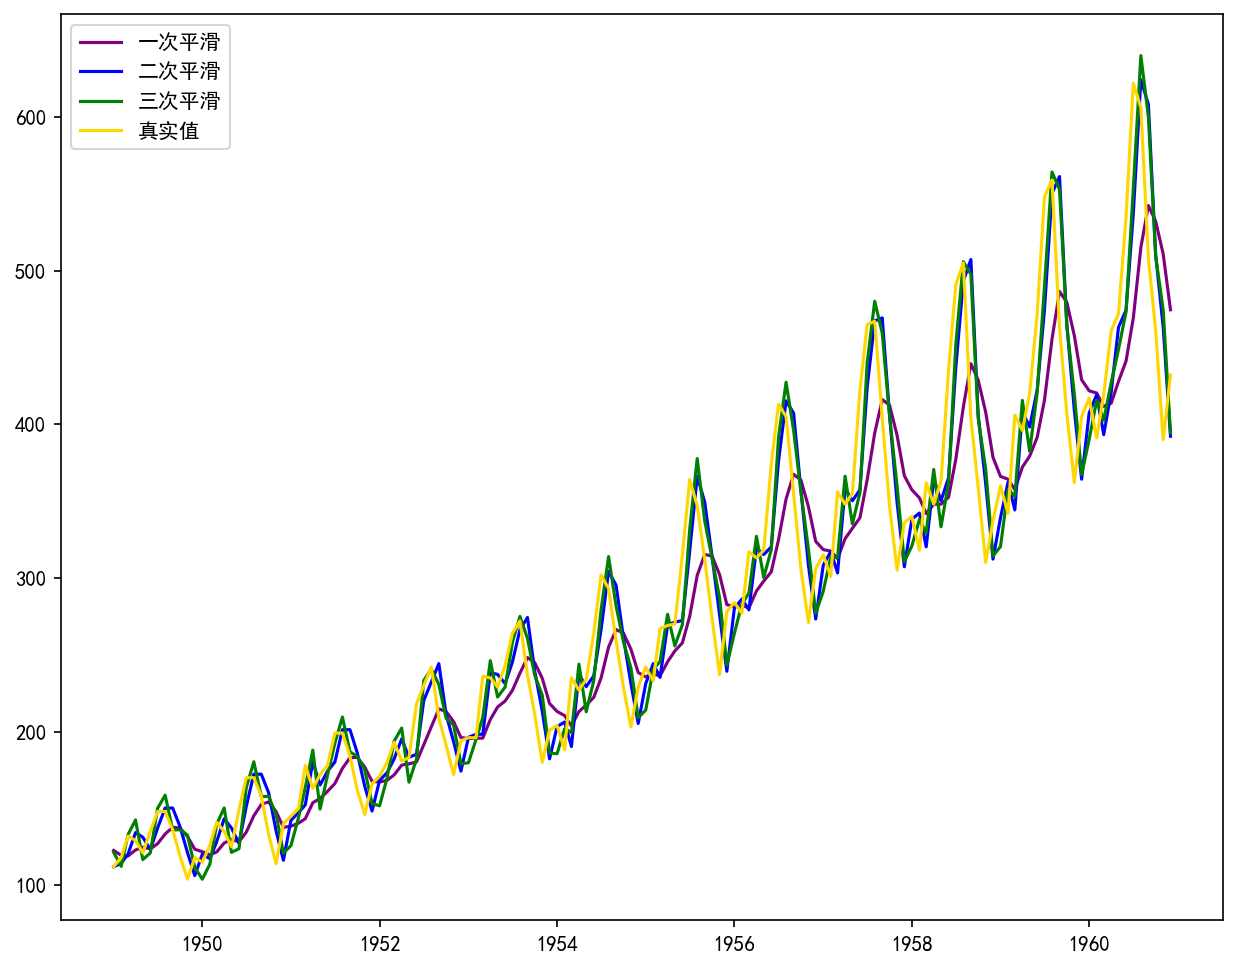

In [51]:
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, 
                                         SimpleExpSmoothing, 
                                         Holt)
# 拟合模型
plt.figure(figsize=(10,8),dpi=150)
data["1exp"] = SimpleExpSmoothing(data["passenger"]).fit(smoothing_level=0.3).fittedvalues
data["2exp_add"] = ExponentialSmoothing(data["passenger"], trend="add", seasonal=None).fit().fittedvalues
data["3exp_add"] = ExponentialSmoothing(data["passenger"], trend="add", seasonal="add",seasonal_periods=4).fit().fittedvalues##季节周期性为4，加法模型
plt.plot(data["1exp"],color='purple',label='一次平滑')
plt.plot(data["2exp_add"],color='blue',label='二次平滑')
plt.plot(data["3exp_add"],color='green',label='三次平滑')
plt.plot(data["passenger"],color='gold',label='真实值')
plt.legend ()
plt.show()

分别采用简单指数平滑，二次指数平滑和三次指数平滑进行预测，拟合结果显示，**三次平滑**较好。<p>
    
 **预测未来一年内的乘客数量**

D:\anoconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anoconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


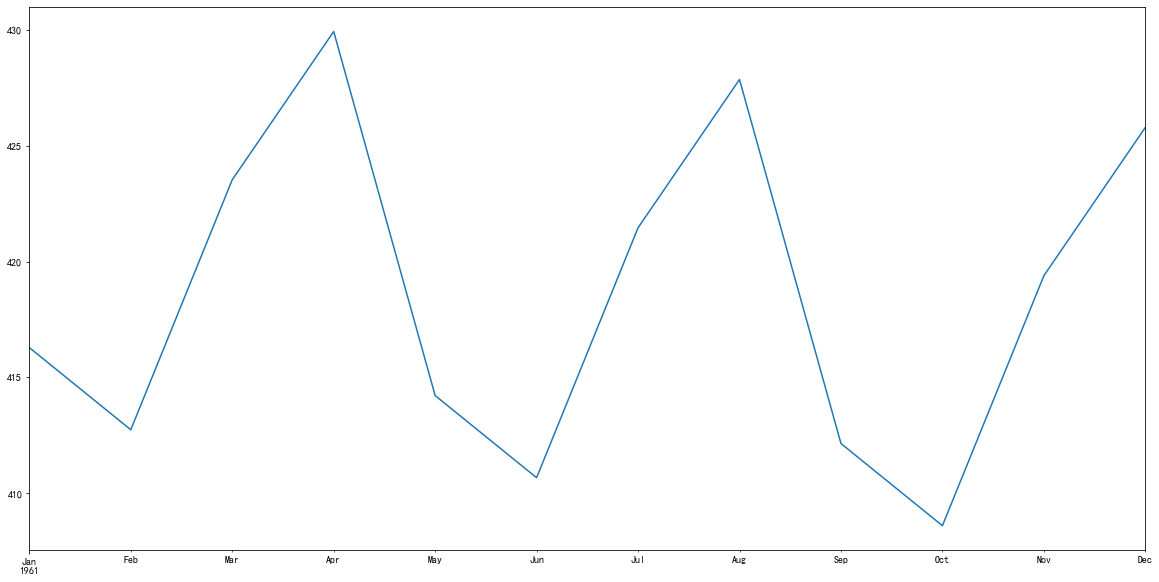

In [90]:
# 预测
model = ExponentialSmoothing(data['passenger'], trend='add', seasonal='add',seasonal_periods=4).fit()##加法模型
pred = model.forecast(12)###预测未来一年的客流量
pred.plot()

## **Holt-Winters模型**

Holt-winter模型是一种三指数平滑模型<p>
预测公式(加法模型)：$\hat{y_{t+h}}=l_t+hb_t+s_{t-m+h}$，其中：<p>
    $l_t=\alpha(y_t-s_{t-m}+(1-\alpha)(l_{t-1}+b_{t-1})$<p>
    $b_t=\beta(l_t-l_{t-1})+(1-\beta)b_{t-1}$<p>
    $s_t=\gamma(y_t-s_{t-1}-b_{t-1})+(1-\gamma)s_{t-m}$<p>
$s_t$指季节性部分，$b_t$指趋势项部分，$l_t$指水平部分，$h$为周期的长度, $m$表示季节频率，则需要确定平滑系数: $\alpha,\beta,\gamma$ <p>
    
Holt Winters()函数介绍：**statsmodels库的Holter-Winters方法实现**<br>
statsmodels.tsa.holtwinters.ExponentialSmoothing(x,trend=None, damped=False, seasonal=None, sp=None, smoothing_level=None, smoothing_slope=None, smoothing_seasonal=None, damping_slope=None, optimized=True, seasonal_periods=False)<p>

**·**smoothing_level($\alpha$): 水平平滑参数<br>
**·**smoothing_slope($\beta$):趋势平滑参数<br>
**·**smoothing_seasonal($\gamma$):季节平滑参数<br>
**·**damping_slope($\phi$): 阻尼趋势系数<br>

Holt-Winters模型主要分为以下三类：<br>
**简单指数平滑模型：SES**，不包含趋势参数和季节参数<br>
**Holt's方法(二次指数平滑)**，包含两个平滑参数，α用于水平，β用于趋势<br>
**Holt-Winters方法(三次指数平滑)**，包含三个平滑参数，α用于水平，β用于趋势，γ用于季节性平滑<br>

# **10.5 ARIMA模型**

## **10.5.1 自相关和偏自相关**

统计中的相关性说的是两个变量间的相关程度。我们假设如果每个变量都符合正态分布，可以使用皮尔逊相关系数（Pearson correlation coefficient）来统计变量间的相关性。<p>
自相关（Autocorrelation）：也叫序列相关，是一个信号于其自身在不同时间点的互相关。自相关用来度量一个序列不同滞后阶数的衰减趋势。<p>
    **K阶自相关函数（ACF）**：$$\rho_k=\rho(t,s)=\frac{COV(X_t,X_t-k)}{\sqrt{DX_t}\sqrt{DX_{t+k}}},k=t-s$$<p>
偏自相关（Partial Autocorrelation）：偏自相关是剔除干扰后时间序列观察与先前时间步长时间序列观察之间关系的总结，偏相关函数用来考察剔除$𝑋_𝑡$与$𝑋_{𝑡+𝑘}$中间序列$𝑋_{𝑡+1},𝑋_{𝑡+2},…,𝑋_{𝑡+𝑘−1}$的干扰后，时间序列$𝑋_𝑡$与$𝑋_{𝑡+𝑘}$之间的相关性。<p>
**K阶偏相关函数（PACF）**：$$\varphi_k=\frac{COV[(X_t,\hat{X_t}),(X_{t+k},\hat{X_{t+k}})]}{D(X_{t+k}-\hat X_{t+k})}$$   

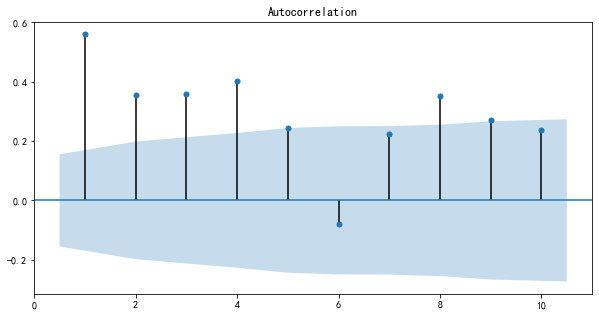

In [164]:
# data from https://github.com/reisanar/datasets
# amtrak data also available in the `Data/` folder
amtrak = pd.read_csv('.\data_chap10\Amtrak.csv', parse_dates=False,
                      index_col='Month')
amtrak.index = pd.to_datetime(amtrak.index, format='%d/%m/%Y')
# amtrak = amtrak.resample('M').mean()

# the shaded region is the 95% CI
fig, ax = plt.subplots(figsize=[10, 5])
_ = sm.graphics.tsa.plot_acf(amtrak, lags=10, ax=ax, zero=False)

In [149]:
autocorr, confint = sm.tsa.stattools.acf(amtrak, nlags=3,  fft=False, alpha=0.05)
print('Lag-1 autocorrelation: %.3f with confint (%.3f, %.3f)'%(autocorr[1], *confint[1]))

Lag-1 autocorrelation: 0.560 with confint (0.404, 0.715)


从该图中，我们可以看到，存在显著的滞后一阶的自相关，这意味着相邻值是正相关的，因为较大值在时间顺序上跟随较大值，而较小值跟随较小值。类似地，如果自相关是负的，则意味着相反的情况——较大值可能跟随较小值，反之亦然。此外，当滞后大于1时，如2、3、4和8，存在正的自相关。这是揭示季节性的重要信号。<p>
现在，让我们看看通过分解时间序列数据，我们从自相关图（或相关图）得出的结论是否有意义。

In [165]:
import statsmodels.api as sm
# stl_decomp = sm.tsa.STL(amtrak).fit()
stl_decomp = seasonal_decompose(amtrak['Ridership'], model="multiplicative")

stl_trend = stl_decomp.trend

stl_seasonal = stl_decomp.seasonal
stl_resid= stl_decomp.resid
stl_lines = {'Data': amtrak,
             'Seasonal': stl_seasonal,
             'Trend': stl_trend,
             'Remainder': stl_resid}
# data.index=pd.to_datetime(data['month'],format='%Y-%m')##设置索引列为时间索引
# data.drop('month',axis=1,inplace=True)

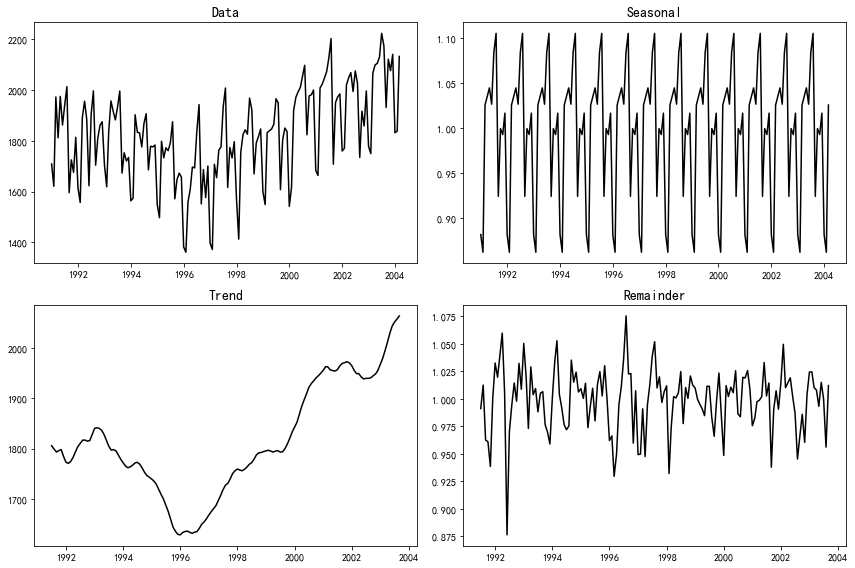

In [166]:
fig, ax_arr = plt.subplots(nrows=2, ncols=2, figsize=[12, 8],
                           sharex=False, sharey=False)
for i, (y_lab, y_val) in enumerate(stl_lines.items()):
    ax = ax_arr.flat[i]
    ax.plot(y_val, color='k')
    ax.set_title(y_lab, size=14)
fig.tight_layout()

**偏自相关**

**补充偏自相关和自相关的定义**

In [153]:
pacorr, pacorr_ci = sm.tsa.stattools.pacf(amtrak, nlags=3, alpha=0.05)
for i, pacorr_i in enumerate(pacorr):
    pacorr_ci_i = pacorr_ci[i]
    print('Partial:\nLag %i: %.3f with CI (%.3f, %.3f)'%(i, pacorr_i, *pacorr_ci_i))
    # also print autocorr
    print('Auto:\nLag %i: %.3f with CI (%.3f, %.3f)'%(i, autocorr[i], *confint[i]))
    print('-*-*-*-*'*5)

Partial:
Lag 0: 1.000 with CI (1.000, 1.000)
Auto:
Lag 0: 1.000 with CI (1.000, 1.000)
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Partial:
Lag 1: 0.563 with CI (0.408, 0.719)
Auto:
Lag 1: 0.560 with CI (0.404, 0.715)
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Partial:
Lag 2: 0.062 with CI (-0.093, 0.218)
Auto:
Lag 2: 0.355 with CI (0.157, 0.554)
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Partial:
Lag 3: 0.208 with CI (0.053, 0.364)
Auto:
Lag 3: 0.360 with CI (0.147, 0.573)
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


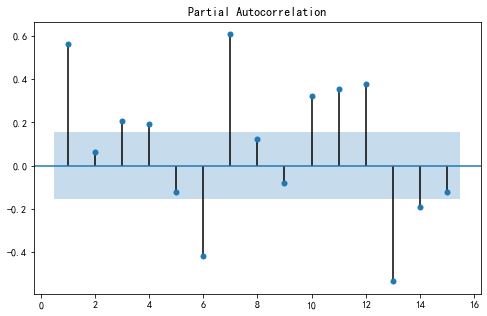

In [154]:
# the shaded region is the 95% CI
fig, ax = plt.subplots(figsize=[8, 5])
_ = sm.graphics.tsa.plot_pacf(amtrak, lags=15, ax=ax, zero=False)

好了，接下来的问题是，为什么我们需要这个部分自相关的概念？我们如何利用它进行时间序列分析？
正如我们稍后将看到的，它与时间序列预测的自回归模型紧密相连。

最后，值得一提的是，有一种特殊类型的时间序列数据叫做白噪声。正如它的名字所暗示的，这样的时间序列值是随机的，因此没有任何固定模式。为了统计地描述它，我们只需要检查时间序列是否具有序列相关性。例如，我们刚刚使用的amtrak数据显然不是白噪声。<p>
我们可以通过随机采样轻松生成一系列白噪声：

In [157]:
white_noise = np.random.normal(0, 1, 1000)

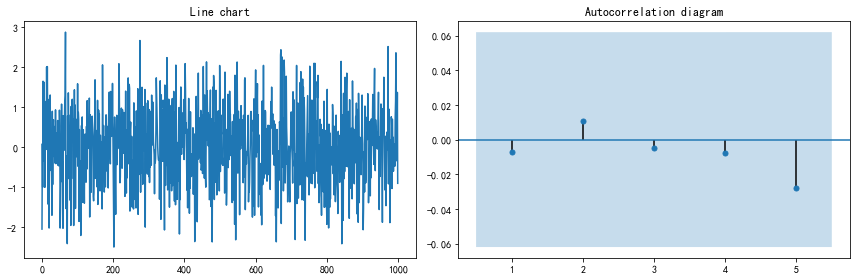

In [158]:
fig, (ax_line, ax_corr) = plt.subplots(figsize=[12, 4], ncols=2)
_ = ax_line.plot(np.arange(white_noise.size), white_noise)
ax_line.set_title('Line chart')
_ = sm.graphics.tsa.plot_acf(white_noise, lags=5, ax=ax_corr, zero=False)
ax_corr.set_title('Autocorrelation diagram')
fig.tight_layout()

## **10.5.2 ARIMA模型基本原理**

**ARIMA模型定义：**ARIMA模型全称为自回归积分滑动平均模型(Autoregressive Integrated Moving Average Model,简记ARIMA)，其中ARIMA(p,d,q)称为差分自回归移动平均模型，AR是自回归，p为自回归项；MA为移动平均,q为移动平均项数，d为时间序列成为平稳时所做的差分次数。所谓ARIMA模型，是指将非平稳时间序列转化为平稳时间序列，然后将因变量仅对它的滞后值以及随机误差项的现值和滞后值进行回归所建立的模型。ARIMA模型根据原序列是否平稳以及回归中所含部分的不同，包括移动平均过程（MA）、自回归过程（AR）、自回归移动平均过程（ARMA）、ARIMA过程以及其它衍生的ARIMA模型。<p>

### AR(Autoregression)

**1.AR模型**<p>
**（1）AR模型形式：**$$X_t=\phi_0+\phi_1X_{t-1}+\phi_2X_{t-2}+…+\phi_pX_{t-p}+\varepsilon_t$$其含义是指一个时间序列${X_t},(t=1,2,…,T)$，如果可以表示为上述形式，即对于任意时刻的$X_t$可以表示为t-p时刻X的线性函数，类似于一个线性回归的形式，则称该时间序列为P阶自回归模型，记作AR(p)。其中，$\phi_i$为自回归系数，$\varepsilon_t$为白噪声，p为滞后阶数，根据p的不同，AR模型可分为一阶自回归模型AR(1)，二阶自回归模型AR(2)等。<p>

**（2）AR模型假设:**<br>
(a) $X_t$与${X_{𝑡−1},𝑋_{𝑡−2},…,𝑋_{𝑡−𝑝}}$存在线性关系；<br>
(b) $\varepsilon_t\sim𝑁(0,\sigma^2)$,即残差项$\varepsilon_t$服从正态分布；<br>
(c) $\varepsilon_t$与$X_{𝑡−𝑝},(p=1,2,3,…)$独立，不存在自相关现象。<p>

In [167]:
# train/test split
N_train = int(0.8*amtrak.size)
N_test = amtrak.size - N_train
amtrak_train = amtrak[:N_train]
amtrak_test = amtrak[N_train:]

In [168]:
# set a small p
from statsmodels.tsa.ar_model import AutoReg
p = 1
ar_p = AutoReg(amtrak_train, lags=p, seasonal=False).fit()

ImportError: cannot import name 'AutoReg' from 'statsmodels.tsa.ar_model' (D:\anoconda3\lib\site-packages\statsmodels\tsa\ar_model.py)

**2.MA模型**<p>
**（1）MA模型形式：**$X_t=\varepsilon_t-\phi_1\varepsilon_{t-1}-\phi_2\varepsilon_{t-2}-…-\phi_q\varepsilon_{t-q}$，其含义是时间序列t时刻的响应值$X_𝑡$与其前$t-q$时刻的残差存在线性关系，$\varepsilon_t$为白噪声，称该模型为移动平均模型($MA(q)$模型)。<p>

**（2）MA模型假设:**<br>
(a) $X_𝑡$与$\varepsilon_{t-1},\varepsilon_{t-2},…,\varepsilon_{t-q}$存在线性关系,与$\varepsilon_{t-q-1}$及之后的扰动项无关；<br>
(b) $\varepsilon_t\sim𝑁(0,\sigma^2)$,即残差项$\varepsilon_t$服从正态分布；<br>
(c) $\varepsilon_t$与$\varepsilon_{t-q}(q=1,2,3,…)$独立，不存在自相关现象。<p>

**3.ARMA模型**<p>
**（1）ARMA模型形式：**$X_t=\phi_0+\phi_1X_{t-1}+\phi_2X_{t-2}+…+\phi_pX_{t-p}+\varepsilon_t-\phi_1\varepsilon_{t-1}-\phi_2\varepsilon_{t-2}-…-\phi_q\varepsilon_{t-q}$，其含义是时间序列t时刻的响应值$X_𝑡$与前t-p时刻的响应值以及其前t-q时刻的残差均存在线性关系，$\varepsilon_t$为白噪声，称该模型为自回归移动平均模型（ARMA(p,q)模型）。ARMA(1,1)即当p和q均滞后一阶时的ARMA模型。<p>
    
**（2）ARMA模型假设**<br>
(a) $X_𝑡$与${X_{𝑡−1},𝑋_{𝑡−2},…,𝑋_{𝑡−𝑝}}$和${\varepsilon_{𝑡−1},\varepsilon_{𝑡−2},…,\varepsilon_{𝑡−𝑞}}$均存在线性关系；<br>
(b) $\varepsilon_t\sim𝑁(0,\sigma^2)$,即残差项$\varepsilon_t$服从正态分布；<br>
(c) $\varepsilon_t$与$\varepsilon_{t-q}(q=1,2,3,…)$独立，不存在自相关现象。<p>

**3.ARIMA模型**<br>
差分：$\Delta^dY=Y_𝑡−Y_{𝑡−𝑑}$，d步差分；<br>
差分：$\Delta Y=Y_𝑡−Y_{𝑡−1}$，1阶差分；<br>
    $~~~~~~~~~~$$\Delta^2Y=\Delta Y_t−\Delta Y_{𝑡−1}$，2阶差分；<br>
    $~~~~~~~~~~$依次类推….<p>

**（1）ARIMA模型形式：**对于一个非平稳序列$Y_𝑡$，如果进行d阶差分后，形成新的序列$X_𝑡$是一个平稳序列，则称序列$Y_𝑡$为一个ARIMA（p,d,q）模型。表达式为：$\Delta^dY=\Delta^{d-1}Y_t-\Delta^{d-1}Y_{t-1}$，且令$X_t=\Delta^dY$，则$X_t=\phi_0+\phi_1X_{t-1}+\phi_2X_{t-2}+…+\phi_pX_{t-p}+\varepsilon_t-\phi_1\varepsilon_{t-1}-\phi_2\varepsilon_{t-2}-…-\phi_q\varepsilon_{t-q}$。此外，ARIMA还有一些其他形式，比如时间序列存在某种趋势，消除这种趋势后可以达到平稳。ARIMA的表达式可以表示为$X_𝑡=\nu_𝑡+\varepsilon_𝑡,\varepsilon_𝑡$服从正态独立同分布的要求，$\mu_𝑡$可以有多种形式，如$\mu_𝑡=a_0+a_1∗𝑡,\mu_𝑡=a_0+𝑎_1∗𝑡+𝑎_2∗𝑡^2$等。<p>
    
**（2）模型假设**<br>
(a) $Y_𝑡$为非平稳序列，但经过差分后可以变为平稳序列，表示为$X_𝑡$；<br>
(b) $X_𝑡$与${X_{𝑡−1},𝑋_{𝑡−2},…,𝑋_{𝑡−𝑝}}$和${\varepsilon_{𝑡−1},\varepsilon_{𝑡−2},…,\varepsilon_{𝑡−𝑞}}$均存在线性关系；<br>
(c) $\varepsilon_t\sim𝑁(0,\sigma^2)$,即残差项$\varepsilon_t$服从正态分布；<br>
(d) $\varepsilon_t$与$\varepsilon_{t-q}(q=1,2,3,…)$和$X_{𝑡−𝑝}(p=1,2,3,…)$独立，不存在自相关。<p>

**Python相关函数: statsmodel内置函数**<br>
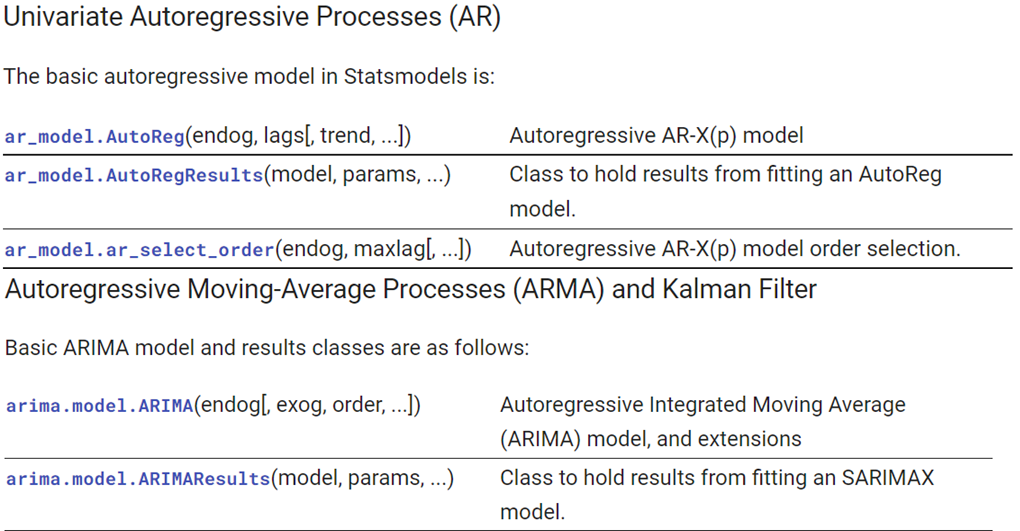

## **10.5.3 平稳性检验**

平稳性是某些时间序列所具有的的特征，一个平稳的序列意味着其均值、方差和协方差不随时间变化。

**1.平稳性检验的方法**<p>
（1）单位根检验。如果序列平稳，就不存在单位根，如果序列非平稳，则存在单位根。如何检验序列是否存在单位根，又可以分为DF检验和ADF检验两种方法。<br>
    $~~~~~~~$ 1）DF检验（Dickey-Fuller test）。这里的零假设是TS是非平稳的。测试结果包括一个测试统计量和一些不同置信水平的临界值。如果“检验统计量”小于临界值，我们可以拒绝无效假设，并认为序列是平稳的。<p>
    $~~~~~~~$ 2）ADF检验（Augmented Dickey-Fuller test）。ADF检验和迪基-福勒检验类似，但ADF检验的好处在于它排除了自相关的影响。DF检验只能应用于一阶情况，当序列存在高阶的滞后相关时，可以使用ADF检验，所以说ADF是对DF检验的扩展。<p>
（2）绘图法。可以通过绘图的方式观察序列的均值是否保持一致，但是这种方法不严格。

**2.非平稳序列平稳化的方法**

**1.通过差分平稳化。**差分是最常用的平稳化方法。理论上，经过足够阶数的差分之后任何时间序列都会变成稳定的，但是高于二阶的差分较少使用：每次差分会丢失一个观测值，丢失数据中所包含的一部分信息。一阶差分得到增长率，二阶差分得到增长率的增长率，而高阶差分则暂时没有明确的解释。<p>
**2.去除趋势平稳化。**去趋势是指消除数据中的线性趋势或者高阶趋势的过程，可以进行一个关于常数、时间t的线性或多项式回归，从回归中得到的残差代表去趋势的时间序列。<p>
**3.结构变换平稳化。**例如通过取对数的方式处理一些非线性趋势序列，或是将序列的指数趋势转换为线性趋势。除此之外，还可以采用指数转换等方法将原来时间序列映射成不同的曲线形态。<p>

<font color='blue'>**【例10.5.3-1】**</font><br>

Text(0, 0.5, 'pm2.5')

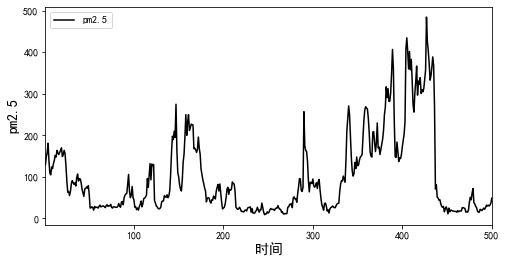

In [111]:
import pandas as pd

pm = pd.read_csv(".\data_chap10\pm2.5.csv",index_col='time')

fig, ax = plt.subplots(figsize=[8, 4])
pm.plot(ax=ax, color='k')
ax.set_xlabel('时间', size=14)
ax.set_ylabel('pm2.5', size=14)

Text(0, 0.5, 'pm2.5（差分）')

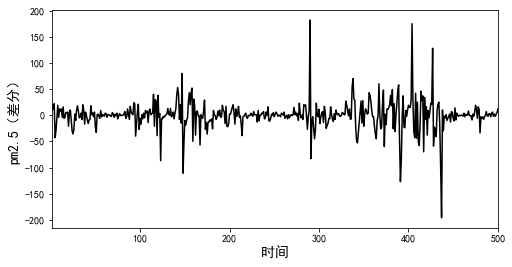

In [112]:
# 观察时间序列趋势
#一阶差分
plt.rcParams['axes.unicode_minus']=False 
diff_pm = pm['pm2.5'].diff(1)##1阶差分

fig, ax = plt.subplots(figsize=[8, 4])
diff_pm.plot(ax=ax, color='k')
ax.set_xlabel('时间', size=14)
ax.set_ylabel('pm2.5（差分）', size=14)

<font color='blue'>**【例10.5.3-2】**</font><br>

Text(0, 0.5, '乘客量')

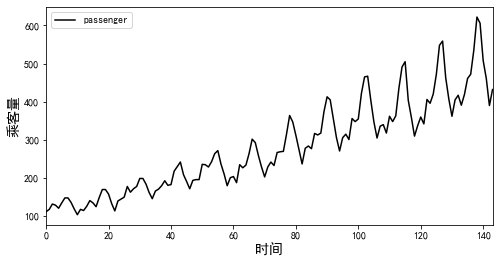

In [113]:
import pandas as pd
data = pd.read_csv('.\data_chap10\passengers.csv')

fig, ax = plt.subplots(figsize=[8, 4])
data.plot(ax=ax, color='k')
ax.set_xlabel('时间', size=14)
ax.set_ylabel('乘客量', size=14)

Text(0, 0.5, '乘客量（差分）')

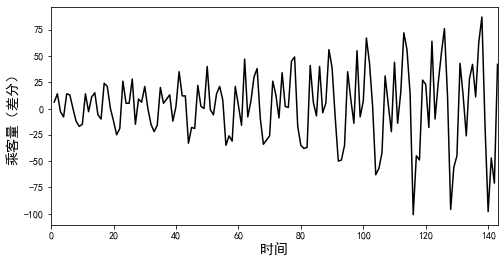

In [114]:
#差分
data1= data['passenger'].diff(1)##1阶差分

fig, ax = plt.subplots(figsize=[8, 4])
data1.plot(ax=ax, color='k')
ax.set_xlabel('时间', size=14)
ax.set_ylabel('乘客量（差分）', size=14)

---------分界线

**ARIMA(p,d,q)模型的确定原则：**<br>
**·**参数d的确定原则，通过几阶差分的平稳性来确定d<br>
**·**p和q的确定原则如下：<br>

| 模型 | 自相关系数 | 偏自相关系数 |
| :----------: | :----------:| :----------: |
| p有取值，q=0  | 拖尾（不是很快衰减为0）| p阶之后截尾（根据截尾情况确定p） |
| p=0，q有取值  | q阶之后截尾（根据截尾情况确定q） | 拖尾（不是很快衰减为0）| 
| p，q有取值    | 拖尾（不是很快衰减为0） | 拖尾（不是很快衰减为0）         | 


### **ARIMA模型实例**

In [115]:
# 读入数据
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import statsmodels.api as sm     #acf,pacf图
from statsmodels.tsa.stattools import adfuller  #adf检验
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
###载入数据
import pandas as pd
data = pd.read_csv(".\data_chap10\pm2.5.csv",index_col='time')

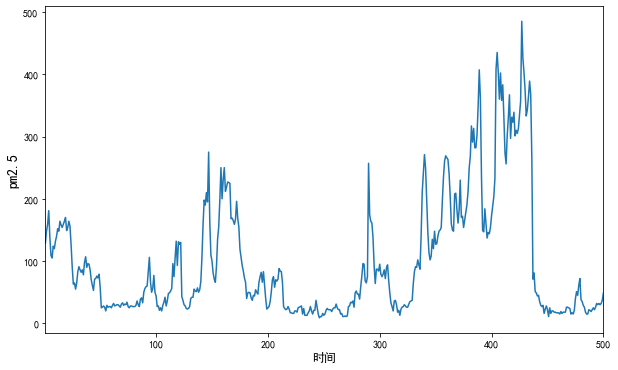

In [116]:
# 绘制时间序列图
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
data["pm2.5"].plot()
plt.xlabel('时间',fontsize=12,verticalalignment='top')
plt.ylabel('pm2.5',fontsize=14,horizontalalignment='center')
plt.show()

In [117]:
# 单位根检验
#进行ADF检验
temp = np.array(data["pm2.5"])
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])

output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
                           
output

,value
Test Statistic Value,-3.22629
p-value,0.0185127
Lags Used,3
Number of Observations Used,496
Critical Value(1%),-3.4436
Critical Value(5%),-2.86738
Critical Value(10%),-2.56988


p值大于0.01，说明该序列存在单位根，即为非平稳序列。<p>
对原序列进行一阶差分变换。

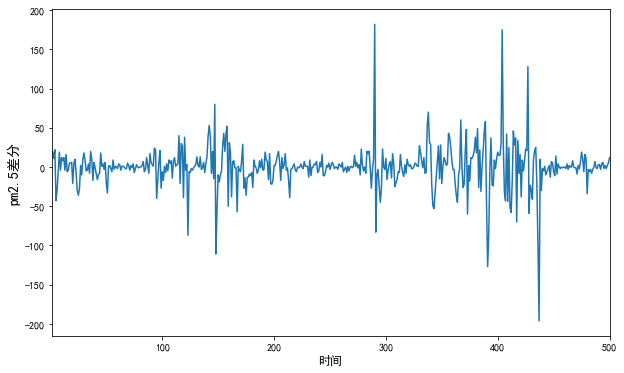

In [118]:
#差分
data1= data["pm2.5"].diff(1)##1阶差分
plt.figure(figsize=(10, 6))
data1.plot()
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
plt.xlabel('时间',fontsize=12,verticalalignment='top')
plt.ylabel('pm2.5差分',fontsize=14,horizontalalignment='center')
plt.show()

In [119]:
#差分序列的ADF平稳性检验
temp = np.diff(data["pm2.5"])
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-8.71023
p-value,3.60779e-14
Lags Used,12
Number of Observations Used,486
Critical Value(1%),-3.44388
Critical Value(5%),-2.86751
Critical Value(10%),-2.56995


p值小于0.01，说明该序列不存在单位根，即为平稳序列。<p>
**查看acf和pacf：**

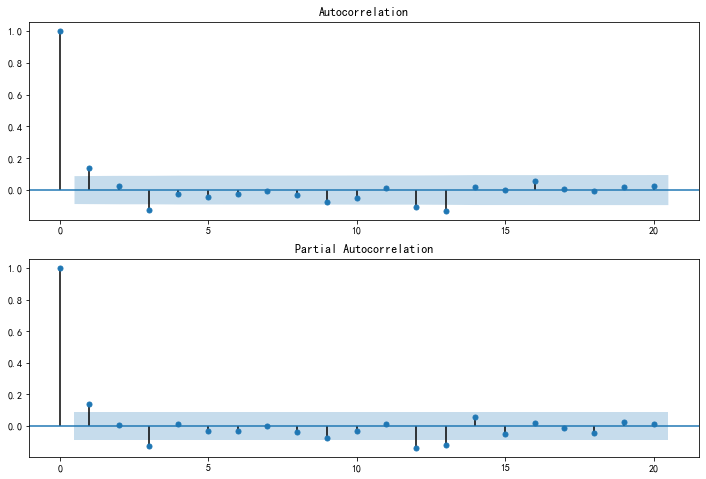

In [121]:

##修改格式
#将差分序列改为与原始数据相同的数据格式
pm = list(np.diff(data["pm2.5"]))
data2 = {
    "时间":data1.index[1:],  #第一个是空值，从第2个开始取
    "pm2.5":pm
}
df = pd.DataFrame(data2)
data_diff = df.set_index(['时间'], drop=True)#将时间设置为索引
data_diff.head()

#差分序列的acf,pacf
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_diff,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_diff,lags=20,ax=ax2)
plt.show()


根据自相关和偏自相关图，我们可以设置p=3，q=3。<p>
    
除了自相关和偏自相关图定阶外，还可以根据AIC、BIC自动定阶。<p>
例如：我们可以选取AIC为评价准则，限制AR最大阶不超过6，MA最大阶不超过4，自动实现模型定阶。

In [122]:
sm.tsa.arma_order_select_ic(data_diff,max_ar=6,max_ma=4,ic='aic')['aic_min_order']

D:\anoconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(4, 3)

定阶完成后，调用ARIMA()函数建立最终模型。

In [123]:
###例：将p,q分别设为4和3
p=4
q=3
model = ARIMA(data, (p,1,q)).fit()
model.summary()        #生成一份模型报告

D:\anoconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\anoconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.pm2.5   No. Observations:                  499
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -2333.126
Method:                       css-mle   S.D. of innovations             25.884
Date:                Mon, 27 Feb 2023   AIC                           4684.251
Time:                        15:02:00   BIC                           4722.165
Sample:                             1   HQIC                          4699.130
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1002      0.171      0.587      0.558      -0.234       0.435
ar.L1.D.pm2.5     0.1532      0.063      2.421      0.016       0.029       0.277
ar.L2.D.pm2.5     0.0425      0.068      0.626      0.531      -0.091       0.176
ar.L3.D.pm2.5     0.7986      0.058     13.667      0.000       0.684       0.913
ar.L4.D.pm2.5    -0.1174      0.049     -2.405      0.017      -0.213      -0.022
ma.L1.D.pm2.5    -0.0304      0.044     -0.687      0.492      -0.117       0.056
ma.L2.D.pm2.5    -0.0371      0.045     -0.831      0.406      -0.125       0.050
ma.L3.D.pm2.5    -0.9324      0.038    -24.663      0.000      -1.007      -0.858
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5543           -0.9332j            1.0854           -0.3353
AR.2           -0.5543           +0.9332j            1.0854            0.3353
AR.3            1.0545           -0.0000j            1.0545           -0.0000
AR.4            6.8581           -0.0000j            6.8581           -0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.5199           -0.8956j            1.0356           -0.3337
MA.3           -0.5199           +0.8956j            1.0356            0.3337
-----------------------------------------------------------------------------
"""

查看拟合情况。

499


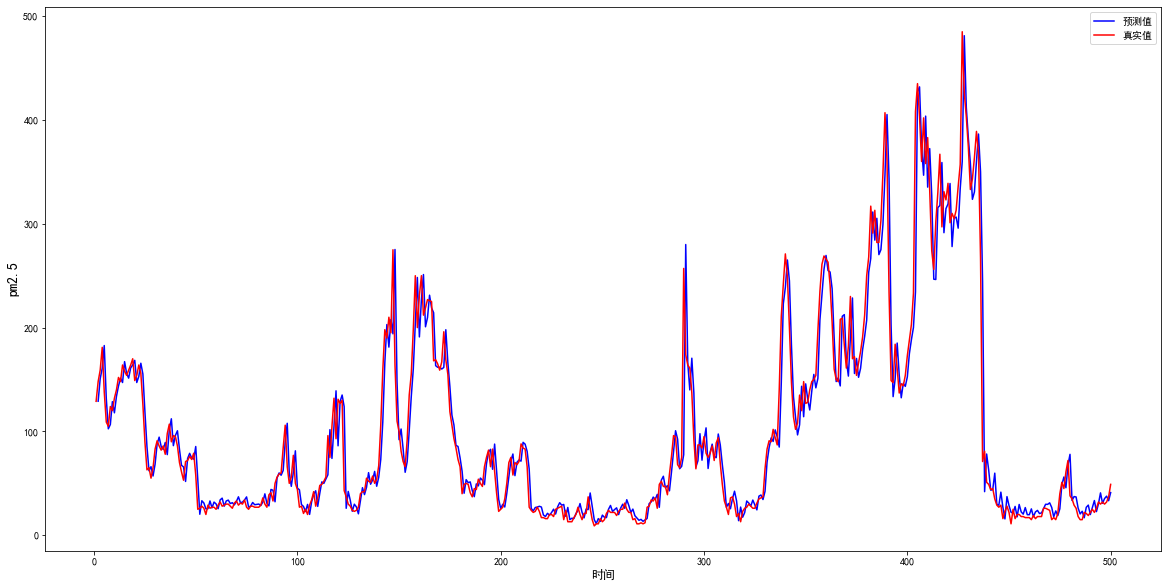

In [128]:
###拟合
predictions_ARIMA_diff = pd.Series(model.fittedvalues, copy=True)
#差分预测值和实际数据有时间错位，所以要进行修改
predictions = [i + j for i, j in zip(list(predictions_ARIMA_diff), list(data["pm2.5"]))]
print(len(predictions))
prediction_sales = {
    "时间":data1.index[1:],
    "pm2.5":predictions
}
prediction_sales = pd.DataFrame(prediction_sales) 
prediction_sales = prediction_sales.set_index(['时间'], drop=True)    
###拟合
plt.plot(prediction_sales,label="预测值",color='b')
plt.plot(data,label="真实值",color='r')
plt.xlabel('时间',fontsize=12,verticalalignment='top')
plt.ylabel('pm2.5',fontsize=14,horizontalalignment='center')
plt.legend()
plt.show()

预测。直接调用model.forecast ()预测：

In [129]:
model.forecast(5)   #为未来5天进行预测，返回预测结果，标准误差，和置信区间

(array([57.79872106, 59.64879761, 61.92682313, 67.98480938, 69.46677152]),
 array([25.88445199, 38.91856443, 48.95102462, 55.64364554, 61.20393728]),
 array([[  7.06612739, 108.53131472],
        [-16.630187  , 135.92778222],
        [-34.01542214, 157.8690684 ],
        [-41.07473185, 177.04435061],
        [-50.49074126, 189.4242843 ]]))

## **10.5.3 模型选择**

根据passenger的差分时间序列图、自相关系数图和偏自相关系数图确定p,d,q如下：<br>
(1) 一阶差分平稳，所以d=1；<br>
(2) 自相关系数和偏自相关系数同时拖尾，因此p, q都有取值；<br>
(3) 偏自相关系数和自相关稀疏拖尾，p最大值取10；自相关系数2期之后拖尾，所以q最大值取8。<p>
    
若采用ARIMA模型分析passenger这一数据,若不确定模型形式，可以根据截尾和拖尾的情况，先给定可能的模型形式如下：<br>
ARIMA(1,1,0)模型，先差分再AR(1)<br>
ARIMA(2,1,0)模型，先差分再AR(2)<br>
ARIMA(0,1,1)模型，先差分再MA(1)<br>
ARIMA(0,1,2)模型，先差分再MA(2)<br>
ARIMA(1,1,1)模型，先差分再ARMA(1,1)<br>
ARIMA(1,1,2)模型，先差分再ARMA(1,2)<br>
ARIMA(2,1,2)模型，先差分再ARMA(2,2)<br>
…
ARIMA(10,1,8)模型，先差分再ARMA(10,8)<br>

然后根据信息准则函数AIC和BIC来选择最优的ARIMA模型。
$$AIC(p)=N*ln(RSS)+2n$$
$$BIC=N*ln(RSS)+n*ln(N)$$
N为样本量，n为模型参数个数，RSS为预测误差。由于自相关系数和偏自相关系数同时拖尾，所以单纯选择AR模型和MA模型的效果不如使用ARMA模型的效果好。<p>